Iteracja 0: x = [1.6 1.6], grad = [8 8]
Norma gradientu: 11.313708498984761
Iteracja 1: x = [0.64 0.64], grad = [3.2 3.2]
Norma gradientu: 4.525483399593905
Iteracja 2: x = [0.256 0.256], grad = [1.28 1.28]
Norma gradientu: 1.8101933598375621
Iteracja 3: x = [0.1024 0.1024], grad = [0.512 0.512]
Norma gradientu: 0.7240773439350248
Iteracja 4: x = [0.04096 0.04096], grad = [0.2048 0.2048]
Norma gradientu: 0.28963093757400993
Iteracja 5: x = [0.016384 0.016384], grad = [0.08192 0.08192]
Norma gradientu: 0.11585237502960398
Iteracja 6: x = [0.0065536 0.0065536], grad = [0.032768 0.032768]
Norma gradientu: 0.046340950011841596
Iteracja 7: x = [0.00262144 0.00262144], grad = [0.0131072 0.0131072]
Norma gradientu: 0.01853638000473664
Minimum znalezione w punkcie: [0.00262144 0.00262144]
Wartość funkcji w minimum: 1.37438953472000e-5


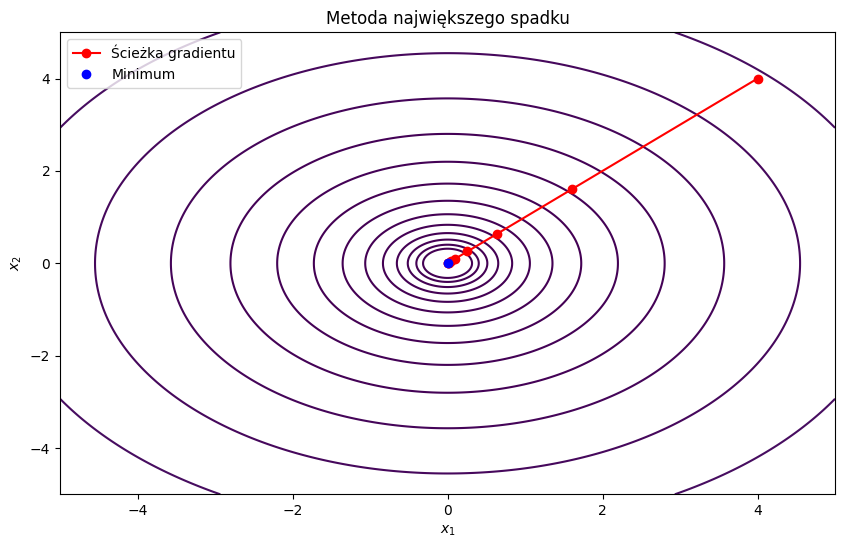

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definiujemy zmienne symboliczne
x1, x2 = sp.symbols('x1 x2')

# Definiujemy funkcję celu
f = x1**2 + x2**2

# Obliczamy gradient symbolicznie
grad_f = [sp.diff(f, var) for var in (x1, x2)]

# Funkcja do przekształcenia gradientu na funkcję numeryczną
grad_f_num = sp.lambdify((x1, x2), grad_f)

# Parametry
x0 = np.array([4, 4])  # Punkt startowy
h = 0.3  # Długość kroku
epsilon = 1e-2  # Kryterium stopu

# Metoda największego spadku
def gradient_descent(x0, h, epsilon):
    x = x0
    history = [x0]
    i = 0
    while np.linalg.norm(grad_f_num(*x)) > epsilon:
        grad_val = np.array(grad_f_num(*x))
        x = x - h * grad_val
        print(f'Iteracja {i}: x = {x}, grad = {grad_val}')
        i += 1
        print(f"Norma gradientu: {np.linalg.norm(grad_val)}")
        history.append(x)
        
    
    return x, history

# Znajdź minimum
minimum, history = gradient_descent(x0, h, epsilon)

# Wypisz wynik
print("Minimum znalezione w punkcie:", minimum)
print("Wartość funkcji w minimum:", f.subs({x1: minimum[0], x2: minimum[1]}))

# Rysowanie wykresów
history = np.array(history)
plt.figure(figsize=(10, 6))

# Wykres konturowy funkcji celu
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = X1**2 + X2**2

plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(history[:, 0], history[:, 1], 'ro-', label='Ścieżka gradientu')
plt.plot(minimum[0], minimum[1], 'bo', label='Minimum')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Metoda największego spadku')
plt.show()

Iteracja 0: x = [6. 2.], f(x) = 0


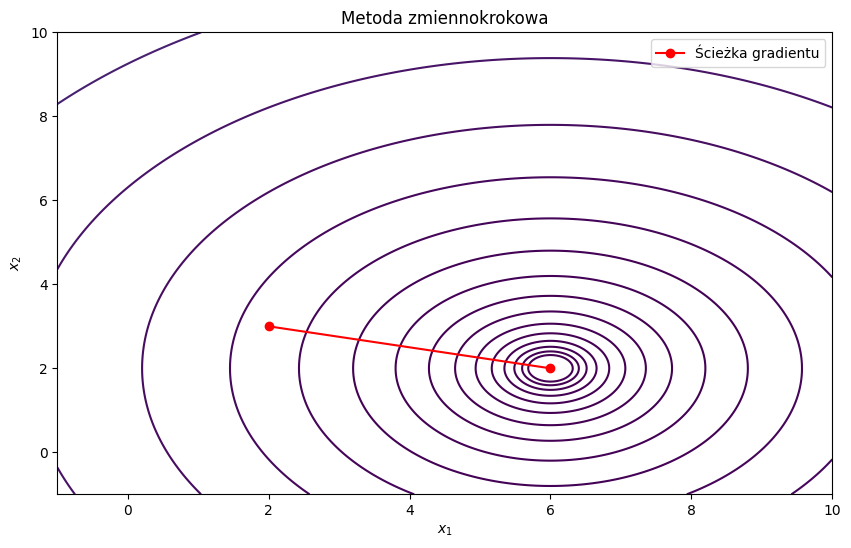

Minimum znalezione w punkcie: [6. 2.]
Wartość funkcji w minimum: 0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#  (𝑥1 − 6)2 + (𝑥2 − 2)2
# Definiowanie zmiennych i funkcji
x1, x2 = sp.symbols('x1 x2')
f = (x1 - 6)**2 + (x2 - 2)**2

# Gradient funkcji
grad_f = [sp.diff(f, var) for var in (x1, x2)]

# Funkcja do obliczania gradientu w punkcie
grad_f_lambdified = [sp.lambdify((x1, x2), grad_f_i) for grad_f_i in grad_f]

def gradient(point):
    return np.array([grad_f_i(point[0], point[1]) for grad_f_i in grad_f_lambdified])

# Parametry algorytmu
epsilon = 1e-2
x = np.array([2.0, 3.0])  # Punkt startowy
alpha = 0.5  # Początkowy krok
max_iter = 1000

# Lista do przechowywania punktów dla rysowania wykresu
history = [x.copy()]

# Metoda zmiennokrokowa
for i in range(max_iter):
    grad = gradient(x)
    if np.linalg.norm(grad) < epsilon:
        break
    
    x = x - alpha * grad
    
    print(f'Iteracja {i}: x = {x}, f(x) = {f.subs({x1: x[0], x2: x[1]})}')
    
    history.append(x.copy())

# Rysowanie wykresów
history = np.array(history)
plt.figure(figsize=(10, 6))

# Wykres konturowy funkcji celu
x1_vals = np.linspace(-1, 10, 400)
x2_vals = np.linspace(-1, 10, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = (X1 - 6)**2 + (X2 - 2)**2

plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(history[:, 0], history[:, 1], 'ro-', label='Ścieżka gradientu')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Metoda zmiennokrokowa')
plt.show()

print(f'Minimum znalezione w punkcie: {x}')
print(f'Wartość funkcji w minimum: {f.subs({x1: x[0], x2: x[1]})}')

Iteracja 0: x = [-710.868965517241 -1911.92413793103], f(x) = -86518.9724137932
Krok: -24.8344827586207
Iteracja 1: x = [-1778.87633182515 -1492.83263975958], f(x) = 2572536.86752617
Krok: 0.247508419822669
Iteracja 2: x = [21112.1903269256 56842.4662647992], f(x) = -76491079.4200997
Krok: -24.8344827586276
Iteracja 3: x = [52868.0200969515 44381.3178740296], f(x) = 2274364185.28850
Krok: 0.247508419822668
Iteracja 4: x = [-627768.498902146 -1690144.00473656], f(x) = -67625303134.5068
Krok: -24.8344827586137
Iteracja 5: x = [-1571987.38371043 -1319627.73348268], f(x) = 2010751687898.00
Krok: 0.247508419822667
Iteracja 6: x = [18665866.8806210 50254258.9401348], f(x) = -59787123502090.5
Krok: -24.8344827585973
Iteracja 7: x = [46741004.8595226 39237432.6446161], f(x) = 1.77769346566674E+15
Krok: 0.247508419822666
Iteracja 8: x = [-555005645.212569 -1494245965.92617], f(x) = -5.28574360625459E+16
Krok: -24.8344827586058
Iteracja 9: x = [-1389783878.53997 -1166674760.44326], f(x) = 1.5716

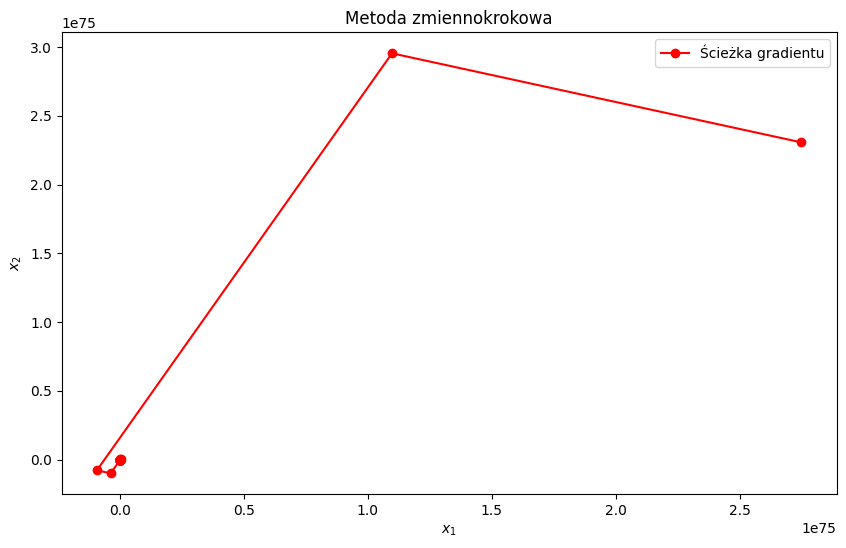

Minimum znalezione w punkcie: [2.74891959589159e+75 2.30762146678531e+75]
Wartość funkcji w minimum: -6.14872183119354E+150


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x1, x2 = sp.symbols('x1 x2')
f = x1 ** 2 + x2 ** 2 - 3 * x1 * x2 + x1 - 2 * x2

f_celu = -f

# Gradient funkcji
grad_f = [sp.diff(f_celu, var) for var in (x1, x2)]

# Funkcja do obliczania gradientu w punkcie
grad_f_lambdified = [sp.lambdify((x1, x2), grad_f_i) for grad_f_i in grad_f]

def gradient(point):
    return np.array([grad_f_i(point[0], point[1]) for grad_f_i in grad_f_lambdified])

# Parametry algorytmu
epsilon = 1e-2
x = np.array([59.0, 50.0])  # Punkt startowy
max_iter = 100

# Lista do przechowywania punktów dla rysowania wykresu
history = [x.copy()]

# Metoda zmiennokrokowa
for i in range(max_iter):
    grad = gradient(x)
    if grad[0] == 0 and grad[1] == 0:
        break
    
    if math.sqrt(grad[0] ** 2 + grad[1] ** 2) < epsilon:
        break
    
    h_0 = sp.Symbol('h_0')
    next_x = x + h_0 * grad
    f_next_x = f.subs({x1: next_x[0], x2: next_x[1]})
    f_next_x_diff = sp.diff(f_next_x, h_0)
    f_next_x_diff_eq_zero = sp.solve(f_next_x_diff, h_0)
    x = x + f_next_x_diff_eq_zero[0] * grad
    print(f'Iteracja {i}: x = {x}, f(x) = {f_celu.subs({x1: x[0], x2: x[1]})}')
    print(f'Krok: {f_next_x_diff_eq_zero[0]}')
    history.append(x.copy())

# Rysowanie wykresów
history = np.array(history)
plt.figure(figsize=(10, 6))

# Wykres konturowy funkcji celu
x1_vals = np.linspace(-400, 400, 400)
x2_vals = np.linspace(-400, 400, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

Z = X1 ** 2 + X2 ** 2 - 3 * X1 * X2 + X1 - 2 * X2

plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(history[:, 0], history[:, 1], 'ro-', label='Ścieżka gradientu')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Metoda zmiennokrokowa')
plt.show()

print(f'Minimum znalezione w punkcie: {x}')
print(f'Wartość funkcji w minimum: {f.subs({x1: x[0], x2: x[1]})}')